# Debut Novels - a comparison between native and exophonic writers

16 December 2020

Introduction to Computational Literary Analysis

Department of English and Comparative Literature, Columbia University

Instructor: Jonathan Reeve

Debut novel, as a writer's first attemp to impress the world, is often written under excitement and uncertainty. Most writers wrote in their mother tongue, while some, for various reasons, chose to write in a foreign language.  

This project will look at 6 debut novels by native and exophonic writers comparatively, as listed below. I will use computational methods to examine their works from lexical, syntactical and stylistic perspectives.

In [2]:
import pycountry
from macroetym.main import Text
import spacy
import nltk
import pandas as pd
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer, SentimentAnalyzer
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [4]:
#To import all text files

liza = open('liza_maugham.md').read()
#William Somerset Maugham | *Liza of Lambeth*
portrait = open('portrait_joyce.md').read()
#James Joyce              | *Portrait of the Artist as a Young Man*
paradise = open('paradise_fitzgerald.md').read()
#Scott Fitzgerald         | *This Side of Paradise*
living = open('living_aynrand.md').read()
#Ayn Rand                 | *We the Living*
sebastian = open('sebastian_nabokov.md').read()
#Vladimir Nabokov         | *The Real Life of Sebastian Knight*
goodprayers = open('goodprayers_li.md').read()
#Yiyun Li                 | *A Thousand Years of Good Prayers*

corpora = [liza, portrait, paradise, living, sebastian, goodprayers]
titles = ['Liza of Lambeth',
          'Portrait of the Artist as a Young Man',
          'This Side of Paradise',
          'We the Living',
          'The Real Life of Sebastian Knight',
          'A Thousand Years of Good Prayers']
authors = ['William Somerset Maugham',
           'James Joyce',
           'Scott Fitzgerald',
           'Ayn Rand',
           'Vladimir Nabokov',
           'Yiyun Li']
language = ['native', 'native','native','exophonic','exophonic','exophonic']

In [5]:
#text metadata
pd.DataFrame(list(zip(titles, authors, language)), columns = ['Work','Author','Language'])

,Work,Author,Language
0,Liza of Lambeth,William Somerset Maugham,native
1,Portrait of the Artist as a Young Man,James Joyce,native
2,This Side of Paradise,Scott Fitzgerald,native
3,We the Living,Ayn Rand,exophonic
4,The Real Life of Sebastian Knight,Vladimir Nabokov,exophonic
5,A Thousand Years of Good Prayers,Yiyun Li,exophonic


## Hypothesis: there is a clear devide between native and exophonic writers.

First let's get an intuitive feeling of whether there is a difference in their styles:

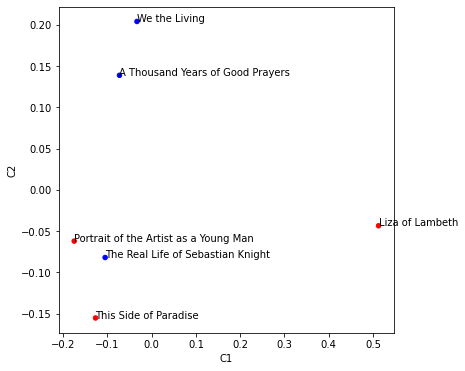

In [6]:
#The following is a PCA (Principal Component Analysis) to visually present their styles based on their frequent words and usages

tfidfVectorizer = TfidfVectorizer(max_features=400)
textMatrix = tfidfVectorizer.fit_transform(corpora)
denseTextMatrix = textMatrix.todense()
pca = PCA(n_components = 2)
textPoints = pca.fit_transform(denseTextMatrix)
textDf = pd.DataFrame(textPoints, index = titles, columns = ['C1', 'C2'])

#red color for native writers, blue for exophonic writers

c = list('r'*3+'b'*3)
#c is color parameter
#color coding for NNS/NS
ax = textDf.plot(kind='scatter', x='C1', y='C2', c = list('r'*3+'b'*3), figsize=(6,6))
for title, points in textDf.iterrows():
    ax.annotate(title, points)

PCA reveals clear diverging styles. Interestingly exophonic writers Ayn Rand and Yiyun Li fall into the upper left corner. Joyce, Nabokov and Fitzgerald belong to the bottom left cluster and Maugham is alone to the right. Nabokov's *The Real Life of Sabastian Knight* is somehow closer to Jyoce than anyone else. To further comprehend the abstract concept of 'stylometry', the following framework and hypotheses are proposed:

    1. Syntax
        For text cohesion, native writers use more word level Coordinating Conjunctions, while exophonic writers use more phrase/sentence level conjunction (Hinkel, 2009)
        
    2. Lexicon:
        2.1 Native writers have higher vocabulary
        2.2 Native writers use more hedges (about, in a way, kind of, maybe, like...) (Hinkel, 2009)
        2.3 Native writers use more idioms (bite the bullet, ball is in your court, silver bullet, two cents...) (Hinkel, 2009)
        2.4 Exophonic writers use more words that are originated from their mother tongue.

## The Experiment

### 1. Syntax - Coordinating Conjunctions

According to ESL(English as Second Language) theories (Hinkel, 2009), native writers use more word level conjunctions, while exophinic writers use more phrase/sentence level conjugation.

Examples of coordinating conjunctions:
> Word:
Mild old Nosebag potters about, very absent-minded **and** harmless - Nabokov

> Phrase:
Father Dolan came in today **and** pandied me because I was not writing my theme - Jyoce

> Sentence:
She could not see the look upon his face, **but** she heard the agony in his voice - Maugham



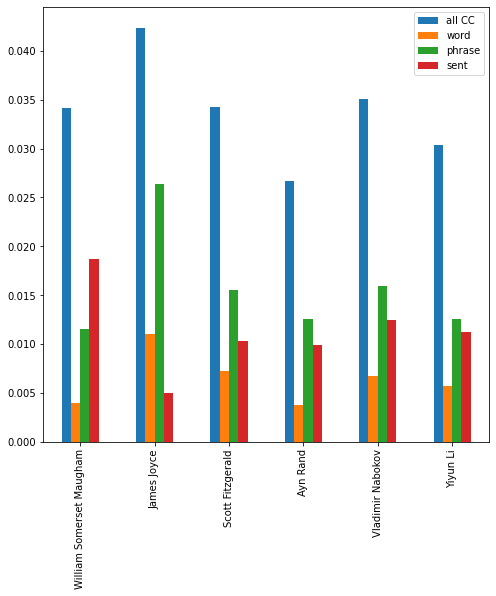

In [7]:
#To compute the proportions of word level, phrase level, sentence level and aggregated coordinating conjunctions usage of each author

corpora_CC = []
work_POS_wordCC = []
work_POS_phraseCC = []
work_POS_sentCC = []
for i,work in enumerate(corpora):
    workToken = nltk.word_tokenize(work.lower())
    pos_tag = nltk.pos_tag(workToken)
    ratio_CC = []
    posCC = []
    wordCC = []
    phraseCC =[]
    sentCC = []
    for i, wordTagPair in enumerate(pos_tag):
        if i == len(pos_tag)-2:
            break
        word, tag = wordTagPair
        prevWord, prevTag = pos_tag[i-1]
        nextWord, nextTag = pos_tag[i+1]
        if tag == 'CC':
            posCC.append(pos_tag[i])
            if prevWord == ',' or prevWord =='.':
                if word != '“':
                    sentCC.append([[pos_tag[i-1],pos_tag[i],pos_tag[i+1]]])
            elif prevTag != nextTag:
                phraseCC.append([pos_tag[i-1],pos_tag[i],pos_tag[i+1]])
            elif prevTag == nextTag:
                wordCC.append([pos_tag[i-1],pos_tag[i],pos_tag[i+1]])
    ratio_wordCC = len(wordCC)/len(workToken)
    ratio_phraseCC = len(phraseCC)/len(workToken)
    ratio_CC = len(posCC)/len(workToken)
    ratio_sentCC = len(sentCC)/len(workToken)
    work_POS_wordCC.append(ratio_wordCC)
    work_POS_phraseCC.append(ratio_phraseCC)
    work_POS_sentCC.append(ratio_sentCC)
    corpora_CC.append(ratio_CC)
    
DFCC = pd.DataFrame(list(zip(titles,authors,corpora_CC,work_POS_wordCC,work_POS_phraseCC,work_POS_sentCC)), index = authors, columns = ['titles','authors','all CC','word','phrase','sent'])
DFCC.plot(kind = 'bar',figsize = (8,8))

From the above visualization, we could see that Joyce used the most word level and phrase level conjunctions, and the least sentence level conjunctions. The hypothesis does not stand for this corpus.

### 2. Lexicon

#### 2.1 Vocabulary

It is natural to think that native speakers possess a higher vocabulary. Is that true for this niche group of writers who chose to write creative works in a foreign language?

By running a TTR (Text to Token Ratio) analysis on the first 20000 words of their works, we see that Fitzgerald has the highest vocalubary, while Maugham had the lowest. The hypothesis is again proven wrong.

In [8]:
def TTR(tokens):
    numTokens = len(tokens)
    numTypes = len(set(tokens))
    return numTypes / numTokens

workRatios = {}

for title, work, author in zip(titles,corpora, authors):
    workToken = nltk.word_tokenize(work.lower())
    truncatedTokens = workToken[-20000:]
    workRatios[title] = (author,TTR(truncatedTokens))
    
pd.DataFrame(workRatios, index = ['author','TTR']).T

,author,TTR
Liza of Lambeth,William Somerset Maugham,0.11665
Portrait of the Artist as a Young Man,James Joyce,0.1761
This Side of Paradise,Scott Fitzgerald,0.20175
We the Living,Ayn Rand,0.14005
The Real Life of Sebastian Knight,Vladimir Nabokov,0.16735
A Thousand Years of Good Prayers,Yiyun Li,0.13995


#### 2.2 Hedge words

Often characterized as sign of vagueness, lexical hedges are more prevalent in informal speech:
> about, in a way, kind of, maybe, like, more or less, more, most, something like, sort of

Do exophonic writers use more hedges? By calculating the percentage of hedge words used in their work, the results leaned slightly towards the hypothesis. Yiyun Li used most hedge words, followed by Fitzgerald, while the others are almost at the same level.

In [31]:
hedges = "about, in a way, kind of, maybe, like, more or less, more, most, something like, sort of"
hedgeList = hedges.lower().split(', ')

def Ngrams(tokens,n):
    ngrams = nltk.ngrams(tokens,n)
    ngramList = list(ngrams)
    return ngramList

listOfHedges = {}
percHedge = {}
for work,title,author in list(zip(corpora, titles, authors)):
    workToken = nltk.word_tokenize(work.lower())
    hedgeUsed = []
    for j in range(3):
        ngrams = Ngrams(workToken,j)
        for ngram in ngrams:
            stringNgram = " ".join(ngram)
            if stringNgram in hedgeList:
                hedgeUsed.append(ngram)
                listOfHedges[author]=hedgeUsed
        j += 1
    percHedge[author] = len(listOfHedges[author])/len(workToken)
    
pd.Series(percHedge)#.plot(kind = 'bar', color = list('r'*3+'b'*3), figsize = (6,6))

William Somerset Maugham    0.009751
James Joyce                 0.010135
Scott Fitzgerald            0.012571
Ayn Rand                    0.010184
Vladimir Nabokov            0.010671
Yiyun Li                    0.015326
dtype: float64

#### 2.3 Idioms

Idioms, symbols to the shared knowledge of Anglo-American culture, are perceived to appear more often in native writers works. I gathered a list of idioms and checked the frenquency of their usage:

In [10]:
#list of idioms from wikipedia (this list contains idioms between 2 and 8 words)
idioms = "a bitter pill to swallow,a dime a dozen,a hot potato,a sandwich short of a picnic,ace in the hole,achilles' heel,all ears,all thumbs,an arm and a leg,apple of discord,at the drop of a hat,back to the drawing board,ball is in your court,balls to the wall,barking up the wrong tree,basket case,beating a dead horse,beat around the bush,bed of roses,the bee's knees,bird brain,bite off more than one can chew,bite the bullet,bite the dust,bought the farm,break a leg,burn the midnight oil,bust his chops,by the length and breadth of,by the seat of his pants,by the skin of his teeth,call a spade a spade,call it a day,champ at the bit,chomp at the bit,cheap as chips,chew the fat,clam up,cold shoulder,couch potato,crocodile tears,cut off your nose to spite your face,cut a rug,cut the cheese,cut the mustard,don't count chickens before they hatch,don't have a cow,drop a dime,elephant in the room,fit as a fiddle,for a song,fly in the ointment,from a to z,from scratch,get bent out of shape,ducks in a row,get your goat,gone south,grasp the nettle,have a blast,have eyes bigger than,have eyes in the back of,head over heels,heard it through the grapevine,hit the roof,hit the nail on the head,hit the road,hit the spot,hold all the cards,jump ship,kick the bucket,kick the habit,kill two birds with one stone,let the cat out of the bag,like pulling hens' teeth,look a gift horse in the mouth,method to his madness,my two cents,nip in the bud,no horse in this race,no dog in this fight,off the hook,once in a blue moon,own goal,part and parcel,the pot calling the kettle black,piece of cake,preaching to the choir,pull his leg,push the envelope,pushing up daisies,put the cat among the pigeons,raining cats and dogs,right as rain,rock the boat,shoot the breeze,shooting fish in a barrel,calm your horses,step up to the plate,screw the pooch,sleep with the fishes,spill the beans,straw that broke the camel's back,take the biscuit,grab the bull by the horns,take the cake,take with a grain of salt,throw stones in glass houses,throw the baby out with the bathwater,throw under the bus,through thick and thin,thumb his nose,tie one on,to steal his thunder,trip the light fantastic,two a penny,under my thumb,under the weather,the whole nine yards,wild goose chase,you can say that again"
idiomsList = idioms.lower().split(',')

listOfIdioms = []
for work,title,author in list(zip(corpora, titles, authors)):
    workToken = nltk.word_tokenize(work.lower())
    idiomused = []
    for j in range(9):
        ngrams = Ngrams(workToken,j)
        for ngram in ngrams:
            stringNgram = " ".join(ngram)
            if stringNgram in idiomsList:
                idiomused = [ngram,title,author]
                listOfIdioms.append(idiomused)
        j += 1
        
pd.DataFrame(listOfIdioms, columns = ['Idiom',"Work", "Author"])

,Idiom,Work,Author
0,"(head, over, heels)",Liza of Lambeth,William Somerset Maugham
1,"(for, a, song)",Liza of Lambeth,William Somerset Maugham
2,"(for, a, song)",Liza of Lambeth,William Somerset Maugham
3,"(hit, the, nail, on, the, head)",Portrait of the Artist as a Young Man,James Joyce
4,"(all, ears)",This Side of Paradise,Scott Fitzgerald
5,"(off, the, hook)",We the Living,Ayn Rand
6,"(wild, goose, chase)",The Real Life of Sebastian Knight,Vladimir Nabokov
7,"(fit, as, a, fiddle)",The Real Life of Sebastian Knight,Vladimir Nabokov
8,"(off, the, hook)",A Thousand Years of Good Prayers,Yiyun Li


However, while inspecting the text, it is discovered that the two 'for a song' used by Maugham is not really an idiom.

> ...They sat down on the grass, and
the concert was begun by Harry, who played a solo; then there was a
call **for a song**, and Jim stood up and sang that ancient ditty, 'O dem
Golden Kippers, O'. There was no shyness in the company, and Liza,
almost without being asked, gave another popular comic song. Then
there was more concertina playing, and another demand **for a song**. 

This proved yet another ESL theory to fail - neither native or exophonic writers like to use cliche in their creative writings.

#### 2.4 Etymology

Do exophonic writers bring words originated from their mother tongue, consciously or unconsciously, to their novels? 

By running an etymological analysis on the 6 novels, we see a majority of the vocabularies still coming from Latinate or Germanic origins. Let's take a closer look into Russian, the first language of Ayn Rand and Nabokov. The chart below does seem to show a relatively higher usage by Ayn Rand (0.20%) than Maugham (0). This translates to approximately 1 more Russian-origin word in every 2 pages of Ayn Rand's *We the Living* as compared to Maugham's *Liza of Lambeth*. Similarly, Yiyun Li uses 1 more Chinese-origin word in every 6 pages than the rest. 

The difference is noticeable, but not substantial. 

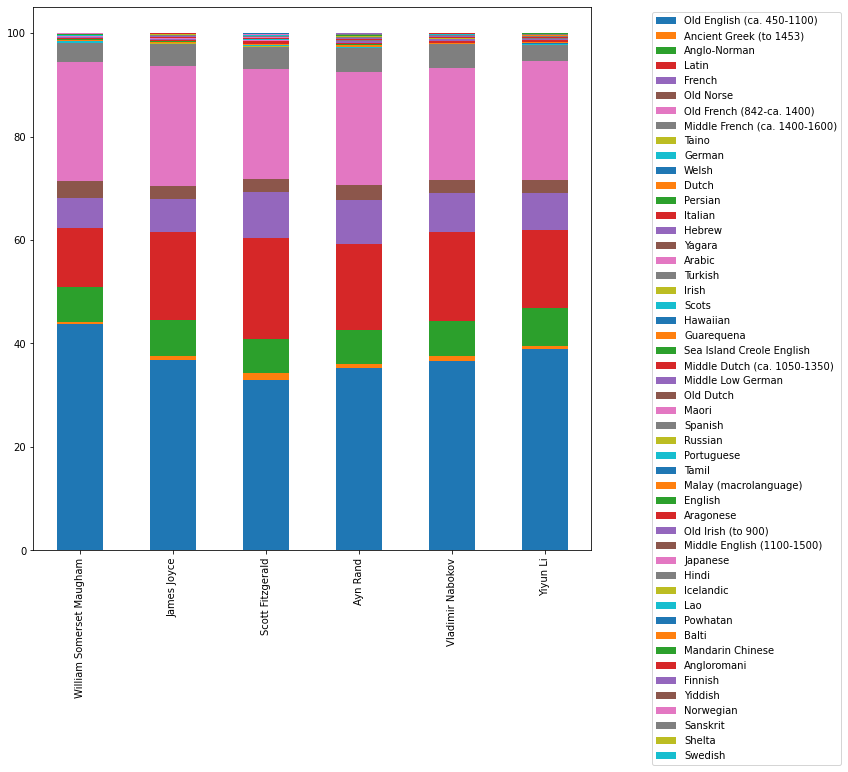

In [34]:
etymData = {}
for work,title,author in list(zip(corpora, titles, authors)):
    etymData[author] = Text(work).prettyStats
pd.DataFrame(etymData).T.plot(kind = 'bar', stacked=True,figsize = (10,10)).legend(bbox_to_anchor=(1.1, 1))

In [35]:
pd.DataFrame(etymData)

,William Somerset Maugham,James Joyce,Scott Fitzgerald,Ayn Rand,Vladimir Nabokov,Yiyun Li
Old English (ca. 450-1100),43.67,36.80,33.03,35.25,36.70,38.98
Ancient Greek (to 1453),0.55,0.85,1.34,0.83,0.90,0.52
Anglo-Norman,6.78,6.95,6.52,6.61,6.76,7.28
Latin,11.23,16.92,19.41,16.54,17.10,15.08
French,5.94,6.37,9.03,8.46,7.61,7.18
Old Norse,3.21,2.62,2.51,2.98,2.45,2.53
Old French (842-ca. 1400),23.02,23.03,21.12,21.79,21.74,22.94
Middle French (ca. 1400-1600),3.66,4.43,4.43,4.68,4.55,3.27
Taino,0.06,0.03,0.05,0.05,NaN,NaN
German,0.25,0.09,0.16,0.12,0.06,0.16


## Beyond Computational Analysis

Computational analysis and tests conducted did not show a significant difference between native and exophonic writers. However, intuitively and through PCA analysis, the distinction is clearly there. What are the possible reasons behind? One might be the editors or proof-readers who 'corrected' writers works, and therefore removed those 'non-authentic' English. We could hardly solve this issue unless we get access to manuscripts.

Another is the difference 'between the lines', which might be abstract and invisible to the above computational framework yet more substantial when perceived by human readers. Due to author's personal language limitations, the following analysis is focused on Yiyun Li's work: (Any thoughts or interpretations  on Ayn Rand and Nabokov from Russian speaking readers are welcomed)

### Lexicon
She used phrases directly translated from Chinese. For example:
- *'Private schools, like all private businesses, are sprouting up across the country like bamboo shoots after the first spring rain.'* 
Here *'bamboo shoots after the first spring rain'* is a direct translation of Chinese word ‘雨后春笋’. 

- In 'Persimmons', through her character, she used the phrase 'heaven’s punishment'（天灾）to describe a drought.

- In many stories, she used the phrase 'working unit' when referring to 'team' in People's Commune and other socialistic organizations. 

These are words specific to Chinese language and culture. On a lexicon level, however, they might not bear direct etymological linkage and therefore couldn't be identified by computaitonal methods(The sentence *'Private schools, like all private businesses, are sprouting up across the country like bamboo shoots after the first spring rain.'* contains 40% words from Old English origins, and 20% each of Dutch, Old French and Latin). I'm curious how these expression are perceived by English native speakers.

### Syntax
- *'For an hour Granny Lin searches, until it occurs to her that the boy may have left the building, and even the school. Paralyzed by **such a** thought, and imagining all kinds of disasters, she calls the two guards, who are playing poker in the small room by the school gate.'*

I personally feel that a native writer might use **the thought** here instead. It is clear enough to convey the message. This is neither a direct translation from Chinese (that would be **this thought**). There is no definte article in Chinese and references are implied. My interpretation is that, when writing in English, she decided to go a bit further to show extra clarity. This may also be interpreted as an emphasis on shockingness for that thought. Again I'm interested in native speaker's perspective.

### Between the languages and worlds:
Her characters live between cultures. In the back is the haunting old memories and upfront lies a new impermeable facade. She is particularly good at depicting the former. She describes, in the story 'A Thousand Years of Good Prayers', a Chinese father observing his daughter making a phone call as *'Her voice, too sharp, too loud, too immodest, is so unpleasant to his ears that for a moment he feels as if he had accidentally caught a glimpse of her naked body, a total stranger, not the daughter he knows.'* I could imagine how her own experience helped her with this unique perspective and intimate depiction.

The characters' interaction with their new country and culture (mostly Chinese immigrants in America) are quite superficial. She wrote, *'if you grew up in a language that you never used to express your feelings, it would be easier to take up another language and talk more in the new language. It makes you a new person.'* I echoed with her that Chinese language is not particularly expressive. Yet it might be over-simplifying and blindly optimistic to guaranteed someone a brightful reborn just by speaking another language. The 'self-sterotyping' went on to its peak in the scene where the father of the Chinese scholar and his new friend, the mother of an Iranian immigrant, came together and used broken English phrases to praise their new lives. Freed from censorship, sophistication and complexity is still vulnerable under the cultural gaze.

The final question is left as - is there a possible way to computationally assess a writer's artistry and creativity? Could human condition be mathematically comprehended?

## Works Cited
Hinkel, E., 2009. Second Language Writers' Text. London: Routledge.